In [1]:
##Importing the required libraries
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
K.set_image_dim_ordering('th') #input shape: (channels, height, width)

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv(r"C:\Users\anitha\Documents\GitHub\hello-world\train.csv")
valid_df = pd.read_csv(r"C:\Users\anitha\Documents\GitHub\hello-world\test.csv")

In [3]:
#Exploring the data 
train_df.describe()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
train_df.shape
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#converting the 1D array into 2D array  to represent an image .and plotting it

x_train = train_df.drop(['label'], axis=1).values.astype('float32')
Y_train = train_df['label'].values
x_valid = valid_df.values.astype('float32')

In [7]:
img_width, img_height = 28, 28

In [8]:
n_train = x_train.shape[0]
n_valid = x_valid.shape[0]

n_classes = 10 

In [9]:
x_train = x_train.reshape(n_train,1,img_width,img_height)
x_valid = x_valid.reshape(n_valid,1,img_width,img_height)

x_train = x_train/255 #normalize from [0,255] to [0,1]
x_valid = x_valid/255 

y_train = to_categorical(Y_train)

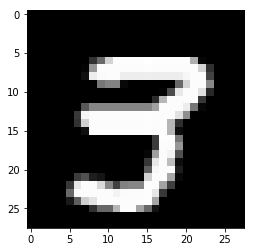

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

imgplot = plt.imshow(x_train[2000,0,:,:,],cmap='gray')

In [11]:
#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)



In [12]:
from keras.models import Sequential
from keras.layers.convolutional import *
from keras.layers.core import Dropout, Dense, Flatten, Activation


In [13]:
n_filters = 128
filter_size1 = 3
filter_size2 = 2
pool_size1 = 3
pool_size2 = 1
n_dense = 256

In [14]:
model = Sequential()

model.add(Convolution2D(n_filters, filter_size1, filter_size1, batch_input_shape=(None, 1, img_width, img_height), activation='relu', border_mode='valid'))
model.add(Convolution2D(n_filters, filter_size2, filter_size2, activation='relu', border_mode='valid'))

model.add(MaxPooling2D(pool_size=(pool_size1, pool_size1)))

model.add(Convolution2D(n_filters, filter_size2, filter_size2, activation='relu', border_mode='valid'))
model.add(Convolution2D(n_filters, filter_size2, filter_size2, activation='relu', border_mode='valid'))

model.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(n_dense))
model.add(Dense(n_dense))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes))

model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\anitha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid", activation="relu", batch_input_shape=(None, 1, ...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anitha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), padding="valid", activation="relu")`
  after removing the cwd from sys.path.
C:\Users\anitha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), padding="valid", activation="relu")`
  
C:\Users\anitha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), padding="valid", activation="relu")`
  if __name__ == '

In [15]:
# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                   # steps_per_epoch=len(x_train) / 128, epochs=100)


In [16]:
batch_size = 128
n_epochs =22

model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=n_epochs,verbose=2,
          validation_split=.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/22
984s - loss: 0.3397 - acc: 0.8926 - val_loss: 0.0538 - val_acc: 0.9823
Epoch 2/22
983s - loss: 0.0940 - acc: 0.9734 - val_loss: 0.0434 - val_acc: 0.9865
Epoch 3/22
985s - loss: 0.0668 - acc: 0.9814 - val_loss: 0.0350 - val_acc: 0.9900
Epoch 4/22
977s - loss: 0.0525 - acc: 0.9851 - val_loss: 0.0379 - val_acc: 0.9902
Epoch 5/22
974s - loss: 0.0449 - acc: 0.9858 - val_loss: 0.0325 - val_acc: 0.9910
Epoch 6/22
979s - loss: 0.0445 - acc: 0.9866 - val_loss: 0.0319 - val_acc: 0.9920
Epoch 7/22
976s - loss: 0.0398 - acc: 0.9883 - val_loss: 0.0299 - val_acc: 0.9925
Epoch 8/22
974s - loss: 0.0319 - acc: 0.9907 - val_loss: 0.0312 - val_acc: 0.9914
Epoch 9/22
976s - loss: 0.0310 - acc: 0.9912 - val_loss: 0.0363 - val_acc: 0.9912
Epoch 10/22
975s - loss: 0.0286 - acc: 0.9915 - val_loss: 0.0345 - val_acc: 0.9921
Epoch 11/22
977s - loss: 0.0266 - acc: 0.9918 - val_loss: 0.0363 - val_acc: 0.9912
Epoch 12/22
977s - loss: 0.0255 - acc: 0.9927 -

In [17]:
#predicting images on the validation data
yPred = model.predict_classes(x_valid,batch_size=32,verbose=1)

np.savetxt(r"C:\Users\anitha\Documents\GitHub\hello-world\mnist_output.csv", np.c_[range(1,len(yPred)+1),yPred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

28000/28000 [==============================] - 374s   


In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
